In [117]:
import pandas as pd

weather = pd.read_csv("C:/Users/dolap/Downloads/Weather.csv", index_col="DATE")

In [118]:
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1/1/1970,IT000016320,"BRINDISI, IT",0.10,NaN,55.0,58.0,50.0
1/2/1970,IT000016320,"BRINDISI, IT",0.00,NaN,49.0,54.0,45.0
1/3/1970,IT000016320,"BRINDISI, IT",0.00,NaN,47.0,54.0,39.0
1/4/1970,IT000016320,"BRINDISI, IT",0.02,NaN,52.0,54.0,50.0
1/5/1970,IT000016320,"BRINDISI, IT",0.07,NaN,56.0,59.0,53.0
...,...,...,...,...,...,...,...
10/29/2022,IT000016320,"BRINDISI, IT",0.00,NaN,67.0,70.0,NaN
10/30/2022,IT000016320,"BRINDISI, IT",0.00,NaN,67.0,NaN,65.0
10/31/2022,IT000016320,"BRINDISI, IT",0.00,NaN,67.0,71.0,NaN


In [119]:
weather.apply(pd.isnull).sum()

#Sum of Null values in each column

STATION        0
NAME           0
PRCP        1718
SNWD       19279
TAVG         645
TMAX        2021
TMIN        2186
dtype: int64

In [120]:
weather.describe()

#Quick Statistics of each column

,PRCP,SNWD,TAVG,TMAX,TMIN
count,17578.000000,17.000000,18651.000000,17275.000000,17110.000000
mean,0.064299,6.223529,62.790842,69.386397,55.955815
std,0.231757,13.987161,11.085186,11.753601,10.963829
min,0.000000,0.400000,32.000000,32.000000,20.000000
25%,0.000000,0.400000,53.000000,59.000000,47.000000
50%,0.000000,1.200000,62.000000,68.000000,55.000000
75%,0.010000,2.400000,73.000000,79.000000,65.000000
max,4.960000,45.700000,96.000000,112.000000,84.000000


In [121]:
null_pct = (weather.apply(pd.isnull).sum()/weather.shape[0])*100

#Percentage of Nul values in each column

In [122]:
null_pct

STATION     0.000000
NAME        0.000000
PRCP        8.903400
SNWD       99.911899
TAVG        3.342662
TMAX       10.473673
TMIN       11.328773
dtype: float64

In [123]:
valid_columns = weather.columns[null_pct < 15]

#Remove colums with data less than 15%

In [124]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [125]:
weather = weather[valid_columns].copy()

#Assign all the new indexed comlums to the weather data, creating a copy

In [126]:
weather.columns = weather.columns.str.lower()

#Asssign lowercase names to the column header

In [127]:
weather

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
1/1/1970,IT000016320,"BRINDISI, IT",0.10,55.0,58.0,50.0
1/2/1970,IT000016320,"BRINDISI, IT",0.00,49.0,54.0,45.0
1/3/1970,IT000016320,"BRINDISI, IT",0.00,47.0,54.0,39.0
1/4/1970,IT000016320,"BRINDISI, IT",0.02,52.0,54.0,50.0
1/5/1970,IT000016320,"BRINDISI, IT",0.07,56.0,59.0,53.0
...,...,...,...,...,...,...
10/29/2022,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,NaN
10/30/2022,IT000016320,"BRINDISI, IT",0.00,67.0,NaN,65.0
10/31/2022,IT000016320,"BRINDISI, IT",0.00,67.0,71.0,NaN


In [128]:
weather = weather.ffill()

#fill every missing value with the last value before a missing column value

In [129]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [130]:
weather.dtypes

station     object
name        object
prcp       float64
tavg       float64
tmax       float64
tmin       float64
dtype: object

In [131]:
weather.index

Index(['1/1/1970', '1/2/1970', '1/3/1970', '1/4/1970', '1/5/1970', '1/6/1970',
       '1/7/1970', '1/8/1970', '1/9/1970', '1/10/1970',
       ...
       '10/24/2022', '10/25/2022', '10/26/2022', '10/27/2022', '10/28/2022',
       '10/29/2022', '10/30/2022', '10/31/2022', '11/1/2022', '11/2/2022'],
      dtype='object', name='DATE', length=19296)

In [132]:
weather.index = pd.to_datetime(weather.index)

#Cover our index into the correct date-format

In [133]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02'],
              dtype='datetime64[ns]', name='DATE', length=19296, freq=None)

In [134]:
weather.index.year.value_counts().sort_index().to_frame()

#Sort each year, to know the number of times it appeared

,DATE
1970,365
1971,365
1972,366
1973,365
1974,365
1975,365
1976,366
1977,365
1978,365
1979,365


<AxesSubplot:xlabel='DATE'>

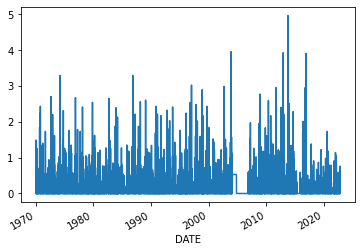

In [135]:
weather["prcp"].plot()

#Quick check of the data, by plotting

In [136]:
weather.head(20)

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
1970-01-01,IT000016320,"BRINDISI, IT",0.10,55.0,58.0,50.0
1970-01-02,IT000016320,"BRINDISI, IT",0.00,49.0,54.0,45.0
1970-01-03,IT000016320,"BRINDISI, IT",0.00,47.0,54.0,39.0
1970-01-04,IT000016320,"BRINDISI, IT",0.02,52.0,54.0,50.0
1970-01-05,IT000016320,"BRINDISI, IT",0.07,56.0,59.0,53.0
1970-01-06,IT000016320,"BRINDISI, IT",0.04,59.0,65.0,57.0
1970-01-07,IT000016320,"BRINDISI, IT",1.09,60.0,64.0,55.0
1970-01-08,IT000016320,"BRINDISI, IT",0.00,54.0,56.0,52.0
1970-01-09,IT000016320,"BRINDISI, IT",0.00,51.0,54.0,48.0


In [137]:
weather.corr()

,prcp,tavg,tmax,tmin
prcp,1.000000,-0.103811,-0.122970,-0.069331
tavg,-0.103811,1.000000,0.922513,0.925117
tmax,-0.122970,0.922513,1.000000,0.882563
tmin,-0.069331,0.925117,0.882563,1.000000


In [138]:
weather["target"] = weather.shift(-1)["tmax"]

In [139]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
1970-01-01,IT000016320,"BRINDISI, IT",0.10,55.0,58.0,50.0,54.0
1970-01-02,IT000016320,"BRINDISI, IT",0.00,49.0,54.0,45.0,54.0
1970-01-03,IT000016320,"BRINDISI, IT",0.00,47.0,54.0,39.0,54.0
1970-01-04,IT000016320,"BRINDISI, IT",0.02,52.0,54.0,50.0,59.0
1970-01-05,IT000016320,"BRINDISI, IT",0.07,56.0,59.0,53.0,65.0
...,...,...,...,...,...,...,...
2022-10-29,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,59.0,70.0
2022-10-30,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,65.0,71.0
2022-10-31,IT000016320,"BRINDISI, IT",0.00,67.0,71.0,65.0,71.0


In [140]:
weather = weather.ffill()

In [141]:
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
1970-01-01,IT000016320,"BRINDISI, IT",0.10,55.0,58.0,50.0,54.0
1970-01-02,IT000016320,"BRINDISI, IT",0.00,49.0,54.0,45.0,54.0
1970-01-03,IT000016320,"BRINDISI, IT",0.00,47.0,54.0,39.0,54.0
1970-01-04,IT000016320,"BRINDISI, IT",0.02,52.0,54.0,50.0,59.0
1970-01-05,IT000016320,"BRINDISI, IT",0.07,56.0,59.0,53.0,65.0
...,...,...,...,...,...,...,...
2022-10-29,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,59.0,70.0
2022-10-30,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,65.0,71.0
2022-10-31,IT000016320,"BRINDISI, IT",0.00,67.0,71.0,65.0,71.0


In [142]:
from sklearn.linear_model import Ridge

In [143]:
weather.corr()

#Check for correllation

,prcp,tavg,tmax,tmin,target
prcp,1.000000,-0.103811,-0.122970,-0.069331,-0.130144
tavg,-0.103811,1.000000,0.922513,0.925117,0.891900
tmax,-0.122970,0.922513,1.000000,0.882563,0.935993
tmin,-0.069331,0.925117,0.882563,1.000000,0.855229
target,-0.130144,0.891900,0.935993,0.855229,1.000000


In [144]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

#Ridge Regression Model

In [145]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [146]:
predictors

Index(['prcp', 'tavg', 'tmax', 'tmin'], dtype='object')

In [147]:
#BackTesting
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test["target"], preds], axis=1)
        
        combined.columns = ["actual", "predictions"]
        
        combined["diff"] = (combined["predictions"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [148]:
predictions = backtest(weather, rr, predictors)

In [149]:
predictions

,actual,predictions,diff
DATE,,,
1979-12-30,60.0,58.900953,1.099047
1979-12-31,51.0,59.559060,8.559060
1980-01-01,55.0,51.821272,3.178728
1980-01-02,47.0,55.533908,8.533908
1980-01-03,45.0,48.380850,3.380850
...,...,...,...
2022-10-29,70.0,70.731397,0.731397
2022-10-30,71.0,71.135480,0.135480
2022-10-31,71.0,71.880125,0.880125


In [150]:
#General Accuracy metrics
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["predictions"])

2.8738447873935176

In [151]:
predictions["diff"].mean()

#Average of the difference

2.873844787393516

In [152]:
def pct_diff(old, new):
    return (new - old)/old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizon =[3, 14]

for horizon in rolling_horizon:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [153]:
weather

,station,name,prcp,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-01,IT000016320,"BRINDISI, IT",0.10,55.0,58.0,50.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,IT000016320,"BRINDISI, IT",0.00,49.0,54.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,IT000016320,"BRINDISI, IT",0.00,47.0,54.0,39.0,54.0,55.333333,-0.024096,44.666667,-0.126866,0.033333,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,IT000016320,"BRINDISI, IT",0.02,52.0,54.0,50.0,59.0,54.000000,0.000000,44.666667,0.119403,0.006667,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,IT000016320,"BRINDISI, IT",0.07,56.0,59.0,53.0,65.0,55.666667,0.059880,47.333333,0.119718,0.030000,1.333333,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-29,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,59.0,70.0,71.333333,-0.018692,59.000000,0.000000,0.006667,-1.000000,72.357143,-0.032577,59.142857,-0.002415,0.005714,-1.000000
2022-10-30,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,65.0,71.0,70.666667,-0.009434,61.000000,0.065574,0.006667,-1.000000,72.357143,-0.032577,59.714286,0.088517,0.005714,-1.000000
2022-10-31,IT000016320,"BRINDISI, IT",0.00,67.0,71.0,65.0,71.0,70.333333,0.009479,63.000000,0.031746,0.000000,NaN,72.357143,-0.018756,60.071429,0.082045,0.005000,-1.000000


In [154]:
weather = weather.iloc[14:, :]

In [155]:
weather

,station,name,prcp,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-15,IT000016320,"BRINDISI, IT",0.04,53.0,58.0,48.0,59.0,58.333333,-0.005714,49.666667,-0.033557,0.060000,-0.333333,57.500000,0.008696,49.214286,-0.024673,0.206429,-0.806228
1970-01-16,IT000016320,"BRINDISI, IT",0.08,56.0,59.0,55.0,55.0,58.666667,0.005682,50.333333,0.092715,0.043333,0.846154,57.857143,0.019753,49.928571,0.101574,0.212143,-0.622896
1970-01-17,IT000016320,"BRINDISI, IT",0.15,52.0,55.0,50.0,56.0,57.333333,-0.040698,51.000000,-0.019608,0.090000,0.666667,57.928571,-0.050555,50.714286,-0.014085,0.222857,-0.326923
1970-01-18,IT000016320,"BRINDISI, IT",0.09,51.0,56.0,46.0,53.0,56.666667,-0.011765,50.333333,-0.086093,0.106667,-0.156250,58.071429,-0.035670,50.428571,-0.087819,0.227857,-0.605016
1970-01-19,IT000016320,"BRINDISI, IT",0.01,48.0,53.0,42.0,48.0,54.666667,-0.030488,46.000000,-0.086957,0.083333,-0.880000,57.642857,-0.080545,49.642857,-0.153957,0.223571,-0.955272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-29,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,59.0,70.0,71.333333,-0.018692,59.000000,0.000000,0.006667,-1.000000,72.357143,-0.032577,59.142857,-0.002415,0.005714,-1.000000
2022-10-30,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,65.0,71.0,70.666667,-0.009434,61.000000,0.065574,0.006667,-1.000000,72.357143,-0.032577,59.714286,0.088517,0.005714,-1.000000
2022-10-31,IT000016320,"BRINDISI, IT",0.00,67.0,71.0,65.0,71.0,70.333333,0.009479,63.000000,0.031746,0.000000,NaN,72.357143,-0.018756,60.071429,0.082045,0.005000,-1.000000


In [156]:
weather = weather.fillna(0)

In [157]:
def expand_mean(df):
    return df.expanding(1).mean()
for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [158]:
weather

,station,name,prcp,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,IT000016320,"BRINDISI, IT",0.04,53.0,58.0,48.0,59.0,58.333333,-0.005714,49.666667,...,49.214286,-0.024673,0.206429,-0.806228,58.000000,58.000000,48.000000,48.000000,0.040000,0.040000
1970-01-16,IT000016320,"BRINDISI, IT",0.08,56.0,59.0,55.0,55.0,58.666667,0.005682,50.333333,...,49.928571,0.101574,0.212143,-0.622896,58.500000,59.000000,51.500000,55.000000,0.060000,0.080000
1970-01-17,IT000016320,"BRINDISI, IT",0.15,52.0,55.0,50.0,56.0,57.333333,-0.040698,51.000000,...,50.714286,-0.014085,0.222857,-0.326923,57.333333,55.000000,51.000000,50.000000,0.090000,0.150000
1970-01-18,IT000016320,"BRINDISI, IT",0.09,51.0,56.0,46.0,53.0,56.666667,-0.011765,50.333333,...,50.428571,-0.087819,0.227857,-0.605016,57.000000,56.000000,49.750000,46.000000,0.090000,0.090000
1970-01-19,IT000016320,"BRINDISI, IT",0.01,48.0,53.0,42.0,48.0,54.666667,-0.030488,46.000000,...,49.642857,-0.153957,0.223571,-0.955272,56.200000,53.000000,48.200000,42.000000,0.074000,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-29,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,59.0,70.0,71.333333,-0.018692,59.000000,...,59.142857,-0.002415,0.005714,-1.000000,71.418647,68.150943,58.912858,56.490566,0.100110,0.041887
2022-10-30,IT000016320,"BRINDISI, IT",0.00,67.0,70.0,65.0,71.0,70.666667,-0.009434,61.000000,...,59.714286,0.088517,0.005714,-1.000000,71.417783,67.981132,58.916565,56.433962,0.100049,0.123208
2022-10-31,IT000016320,"BRINDISI, IT",0.00,67.0,71.0,65.0,71.0,70.333333,0.009479,63.000000,...,60.071429,0.082045,0.005000,-1.000000,71.417529,67.735849,58.920268,55.754717,0.099988,0.032453


In [159]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [160]:
predictors

Index(['prcp', 'tavg', 'tmax', 'tmin', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp',
       'rolling_3_prcp_pct', 'rolling_14_tmax', 'rolling_14_tmax_pct',
       'rolling_14_tmin', 'rolling_14_tmin_pct', 'rolling_14_prcp',
       'rolling_14_prcp_pct', 'month_avg_tmax', 'day_avg_tmax',
       'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp', 'day_avg_prcp'],
      dtype='object')

In [161]:
predictors = backtest(weather, rr, predictors)

In [162]:
mean_absolute_error(predictions["actual"], predictions["predictions"])

2.8738447873935176

In [163]:
predictions.sort_values("diff", ascending=False)

,actual,predictions,diff
DATE,,,
1987-11-14,32.0,68.447729,36.447729
1989-01-16,32.0,55.901999,23.901999
1987-11-15,64.0,40.255881,23.744119
2021-02-13,41.0,62.518891,21.518891
2015-03-20,77.0,56.173705,20.826295
...,...,...,...
2017-01-16,54.0,53.999292,0.000708
2001-05-23,73.0,72.999514,0.000486
2019-12-06,62.0,62.000385,0.000385


In [164]:
weather.loc["1990-03-7": "1990-03-14"]

,station,name,prcp,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,IT000016320,"BRINDISI, IT",0.00,48.0,60.0,36.0,61.0,58.000000,0.034483,40.666667,...,45.785714,-0.213729,0.007857,-1.0,58.636364,55.285714,46.014354,43.000000,0.098852,0.093333
1990-03-08,IT000016320,"BRINDISI, IT",0.00,53.0,61.0,41.0,67.0,59.666667,0.022346,39.333333,...,45.357143,-0.096063,0.007857,-1.0,58.640127,57.095238,46.006369,44.666667,0.098694,0.093810
1990-03-09,IT000016320,"BRINDISI, IT",0.00,56.0,67.0,46.0,60.0,62.666667,0.069149,41.000000,...,44.928571,0.023847,0.007857,-1.0,58.653418,56.619048,46.006359,44.809524,0.098537,0.117619
1990-03-10,IT000016320,"BRINDISI, IT",0.11,55.0,60.0,48.0,63.0,62.666667,-0.042553,45.000000,...,44.785714,0.071770,0.015714,6.0,58.655556,56.952381,46.009524,45.238095,0.098556,0.149524
1990-03-11,IT000016320,"BRINDISI, IT",0.00,53.0,63.0,44.0,63.0,63.333333,-0.005263,46.000000,...,44.928571,-0.020668,0.015714,-1.0,58.662441,57.142857,46.006339,45.047619,0.098399,0.134286
1990-03-12,IT000016320,"BRINDISI, IT",0.00,55.0,63.0,44.0,60.0,62.000000,0.016129,45.333333,...,45.000000,-0.022222,0.015714,-1.0,58.669304,57.333333,46.003165,45.714286,0.098244,0.018095
1990-03-13,IT000016320,"BRINDISI, IT",0.00,56.0,60.0,50.0,60.0,62.000000,-0.032258,46.000000,...,45.071429,0.109350,0.014286,-1.0,58.671406,56.285714,46.009479,44.714286,0.098088,0.026190
1990-03-14,IT000016320,"BRINDISI, IT",0.00,56.0,60.0,52.0,60.0,61.000000,-0.016393,48.666667,...,45.357143,0.146457,0.007857,-1.0,58.673502,57.428571,46.018927,43.761905,0.097934,0.067143


In [166]:
predictions["diff"].round().value_counts().sort_index()

0.0     2550
1.0     3970
2.0     2670
3.0     1719
4.0     1303
5.0      946
6.0      761
7.0      538
8.0      371
9.0      291
10.0     153
11.0     125
12.0      79
13.0      72
14.0      33
15.0      21
16.0      12
17.0      11
18.0       7
19.0       5
20.0       3
21.0       2
22.0       1
24.0       2
36.0       1
Name: diff, dtype: int64

<AxesSubplot:>

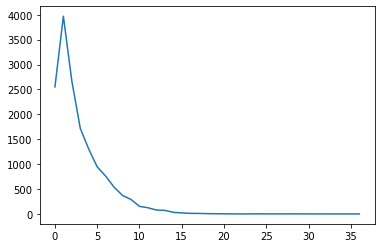

In [167]:
predictions["diff"].round().value_counts().sort_index().plot()